<div style="background-color:#f0f8ff; border-radius:8px; padding:12px; text-align:center;">

# **PRACTICA 1: KNN y selección de atributos**

</div>

*Aprendizaje Automático*

---

**Grupo:** G-7312  
**Número de pareja:** 01  
**Miembros:**  
- Leire Bernárdez Vázquez  
- Carmen Reiné Rueda


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from mRMR import mRMR
from KNNClassifier import KNNClassifier


### **1. Implementación de kNN**

---

***a) Descargue de los datos sobre cáncer de mama***

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

***b) Preprocese el dataset siguiendo estos pasos:***

***1. Separe los atributos de las etiquetas***

***2. Divida los datos en una partici ́on con el 70 % de los puntos para training y el 30 % de los puntos para test***

***3. Normalice los datos***

In [3]:
X = data.data      # atributos
y = data.target    # etiquetas

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***c) Si hubiera datos ausentes (missing values) y  ́estos se completaran:***


***1. ¿Cómo cree que influiría el orden en el que se realizan las operaciones de normalizar y completar?***

***2. ¿Qué pasaría si primero se completan los datos ausentes y luego se normaliza?***

***3. ¿Y si primero se normaliza y luego se realiza la partición training-test?***

Respuesta:

1. Primero completar y luego normalizar sería lo correcto. Primero imputamos valores faltantes (media, mediana, etc.), y después normalizamos, así la media/desviación se calcula sobre datos coherentes.
2. Primero normalizar y luego completar no sería correcto. Los valores “NaN” distorsionarían la media/desviación, y la normalización no tendría sentido.
3. Normalizar antes de dividir en train/test sería incorrecto. La media y desviación estarían influenciadas por el test set (data leakage). Siempre normalizamos después de dividir.

***d) A continuación, complete la clase KNNClassifier, cuyos atributos son el número de vecinos y una funci ́on distancia (una función cuyas entradas son dos vectores de la misma dimensión, y cuya salida es un numero real positivo). Complete el constructor y los m ́etodos fit y predict.***

Hecho.

***e) Utilice la clase anterior para predecir las etiquetas de los datos de test, con un número de vecinos k, fijo pero arbitrario.***

In [6]:
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

***f) Responda a la siguiente pregunta: ¿Qué ocurrir ́ıa si hubiera un desbalanceo de clases en el conjunto de entrenamiento? Si esto supone un problema, ¿podría proporcionar una solución?***

Si una clase tiene muchos más ejemplos, KNN tenderá a predecir siempre esa clase.
Soluciones posibles:
- Ponderar los vecinos por la inversa de la distancia.
- Usar técnicas de balanceo (oversampling/undersampling, SMOTE).
- Elegir una métrica de evaluación robusta al desbalance (f1-score, balanced accuracy).

***g) Responda a la siguiente pregunta: ¿Cuál es el coste en memoria del algoritmo KNN? ¿Se le ocurre alguna forma de reducirlo?***

KNN es un algoritmo no paramétrico: guarda todos los datos de entrenamiento en memoria, que implica un coste O(Nxd).
Para reducirlo:

- Usar estructuras de búsqueda (KD-trees, ball trees).
- Usar reducción de dimensionalidad (PCA, selección de atributos).
- Usar un subconjunto representativo de datos (prototyping).

***h) Utilice la funci ́on KNeighborsClassifier de la biblioteca de sklearn y, para el mismo n ́umero de vecinos k prediga las etiquetas del conjunto de test ypredsk. Si ypredcustom son las prediciones de su modelo, ¿cuál es el error medio entre las predicciones ypredsk e ypredcustom? ¿Por qué?***

In [7]:
sk_knn = KNeighborsClassifier(n_neighbors=5)
sk_knn.fit(X_train, y_train)
y_pred_sk = sk_knn.predict(X_test)

# Error medio entre predicciones
error = (y_pred_sk != y_pred).mean()
print("Error medio:", error)

Error medio: 0.0


    Justificar el porqué

***e) Se encuentra usted a un individuo que afirma que, en vez de utilizar KNN, el prefiere usar la siguiente alternativa. Para predecir la etiqueta del punto x, toma los tres puntos más cercanos a x en el conjunto de training.***

***Si las distancias de estos tres puntos al punto x son d1, d2 y d3, y sus respectivas etiquetas son y1, y2 e y3, la predicción vendrá dada por:***

***f (x) = sign ( 3∑ i=1 (yi/di) )***

***¿Considera que este método es mejor que KNN con k = 3? ¿Por qué?***

Dado el modelo propuesto:

- **KNN con k=3 estándar**: vota por mayoría simple. Todos los vecinos cuentan igual, aunque uno esté muy cerca y otro bastante más lejos.
- **Método propuesto**: da más importancia a los vecinos más cercanos. Si un vecino está mucho más cerca que los otros dos, su etiqueta tiene más peso en la decisión.

Teniendo en ceuenta el modelo descrito, podemos sacar las siguientes ventajas y desventajas:

- **Ventaja**: puede ser más robusto en situaciones donde los vecinos están a distancias muy diferentes. Ejemplo: si tienes un vecino muy cercano de clase A y dos vecinos algo más lejanos de clase B, el método ponderado asignará A, mientras que KNN (k=3) daría B.
- **Inconveniente**: si las distancias son muy similares, el método propuesto se comporta casi igual que KNN, pero es más sensible a la escala de las distancias (si no se normalizan bien los atributos, el peso puede distorsionarse).

En conclusión, el método ponderado por distancias suele considerarse una mejora sobre KNN clásico porque aprovecha la información de cuán cerca está cada vecino, no solo cuántos hay. Sin embargo, no siempre será mejor en la práctica, depende de cómo estén distribuidos los datos y de la escala de los atributos.

### **2. Optimización de kNN**

---

***a) Encuentre, utilizando validación cruzada, el número de vecinos óptimos, kopt.***

In [8]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.pipeline")

pipe=Pipeline([('scaler', StandardScaler()), ('knn', KNNClassifier())])

param_grid = {'knn__k': list(range(1, 31))}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

print("k óptimo:", grid.best_params_['knn__k'])

k óptimo: 6


***b) Dé la métrica de accuracy sobre el conjunto de test del clasificador KNN usando el valor kopt obtenido.***

In [9]:
best_knn = KNNClassifier(k=6)
best_knn.fit(X_train, y_train)
test_acc = best_knn.score(X_test, y_test)
print("Accuracy en test:", test_acc)

Accuracy en test: 0.9590643274853801


***c) ¿Cree que el valor kopt encontrado es el que proporciona mejor accuracy en el conjunto de test?***

No necesariamente, ya que se elige para maximizar el rendimiento en validación cruzada, no en el test. Puede pasar que otro k dé un poco más de accuracy en el test, pero eso sería un sobreajuste al test si lo eligiéramos así. Lo correcto es quedarse con kopt por validación.

***d) Muestre en una gráfica el accuracy frente al n ́umero de vecinos, tanto para el conjunto de training como para el de test.***

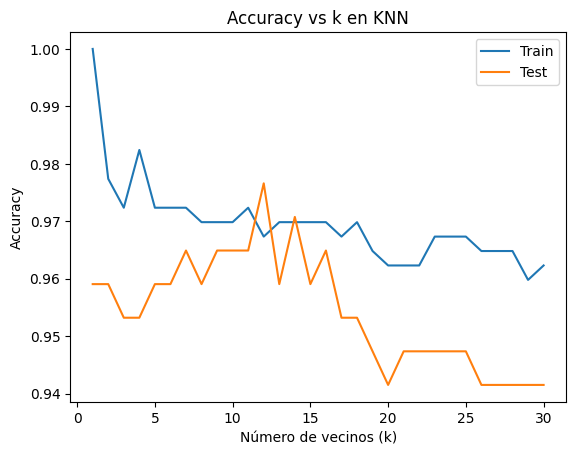

In [11]:
k_values = range(1, 31)
acc_train, acc_test = [], []

for ks in k_values:
    knn = KNNClassifier(k=ks)
    knn.fit(X_train, y_train)
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))

plt.plot(k_values, acc_train, label="Train")
plt.plot(k_values, acc_test, label="Test")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k en KNN")
plt.legend()
plt.show()

La gráfica muestra overfitting para k pequeños y underfitting para k muy grandes.

***e) Repita los experimentos anteriores utilizando la distancia de Minkowski para p ∈ {1, 2, 10}.***

In [15]:
def minkowski_distance(p):
    def dist(a, b):
        return np.sum(np.abs(a - b) ** p) ** (1 / p)
    return dist

In [21]:
ps = [1, 2, 10]

for p in ps:
    knn = KNNClassifier(k=6, distance_metric=minkowski_distance(p))
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"Accuracy con Minkowski p={p}: {acc:.4f}")

Accuracy con Minkowski p=1: 0.9474
Accuracy con Minkowski p=2: 0.9591
Accuracy con Minkowski p=10: 0.9532


***f) ¿Cómo afecta el valor de p a los resultados? ¿Qué p cree que es mejor?***

Dados los resultados:

- p=1 (Manhattan): más robusto a outliers y diferencias grandes en un atributo.
- p=2 (Euclídea): la más usada; capta bien la noción de distancia “geométrica”.
- p=10: las mayores diferencias en una coordenada dominan la distancia → puede degradar rendimiento.

Normalmente p=2 (euclídea) es la mejor opción, aunque depende del dataset.

### **3. Selección de atributos. A continuación procederemos a la reducción de la dimensión de los datos.**

---

***a) Usando el método VarianceThreshold de sklearn.feature selection para cierto umbral fijo u, elimine los atributos que no superen dicho umbral***

In [ ]:
from sklearn.feature_selection import VarianceThreshold

u = 1
selector = VarianceThreshold(threshold=u)

X_train_sel = selector.fit_transform(X_train)
X_test_sel = selector.transform(X_test)

print("Forma original X_train:", X_train.shape)
print("Forma reducida X_train:", X_train_sel.shape)


Forma original X_train: (398, 30)
Forma reducida X_train: (398, 13)


***b) Analice cómo afecta la selección de atributos al accuracy del modelo. Para ello, fijado un valor de k para KNN, calcule accuracy en test. El conjunto de entrenamiento tendr ́a los atributos seleccionados para un umbral u ∈ [0, 1] concreto. El resultado será una gráfica con el accuracy frente al umbral u***

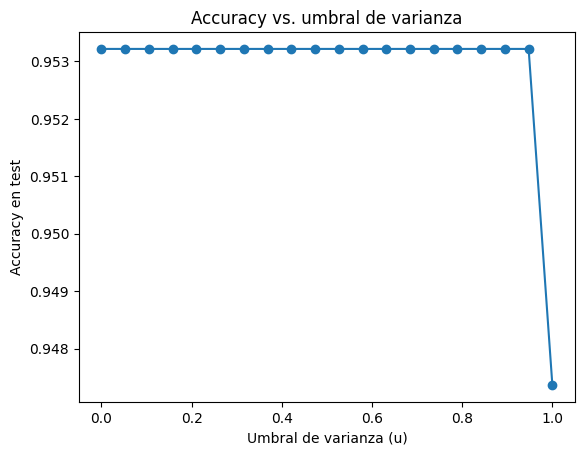

In [ ]:
k = 4  # número fijo de vecinos en KNN
umbrales = np.linspace(0, 1, 20)  # 20 valores entre 0 y 1

accuracies = []
for u in umbrales:
    selector = VarianceThreshold(threshold=u)
    X_train_sel = selector.fit_transform(X_train)
    X_test_sel = selector.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(umbrales, accuracies, marker="o")
plt.xlabel("Umbral de varianza (u)")
plt.ylabel("Accuracy en test")
plt.title("Accuracy vs. umbral de varianza")
plt.show()


***c) ¿Tienen sentido los casos u = 0 y u = 1?***

**u = 0**  
  - El selector elimina solo las características **con varianza nula** (atributos constantes que no aportan información).  
  - Sí tiene sentido, porque esas features no ayudan al modelo.  
  - En la práctica, es un buen valor inicial para limpiar atributos inútiles.

**u = 1**  
  - El selector elimina todas las características cuya varianza sea **≤ 1**.  
  - Como hemos normalizado los datos (media 0, varianza 1), la mayoría de atributos quedan muy cerca de ese valor.  
  - Esto provoca que casi todas las features se eliminen, dejando muy poca o ninguna → lo cual no tiene sentido, porque el modelo perdería información.

**Conclusión:**  
- u = 0 es útil para eliminar atributos constantes.  
- u = 1 elimina casi todo y no es práctico tras la normalización.

***d ) Ahora seleccione los mejores atributos del conjunto de datos utilizando SelectKBest de la librer ́ıa scikit-learn. Siga los siguientes pasos:***

***1. Importe el método SelectKBest***

***2. Utilice una estadística univariada como f_classif para la selección de atributos***

***3. Seleccione los mejores K atributos***

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
# Definimos el número de atributos a seleccionar
K = 10  

selector = SelectKBest(score_func=f_classif, k=K)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

print("Forma original X_train:", X_train.shape)
print("Forma reducida X_train:", X_train_sel.shape)


Forma original X_train: (398, 30)
Forma reducida X_train: (398, 10)


***e) Combinando el método de selección de atributos con el clasificador KNN para un valor de k fijo, determinte cuál es el mejor valor de K. Nótese que k hace referencia al número de vecinos en KNN y K es el número de atributos seleccionado***

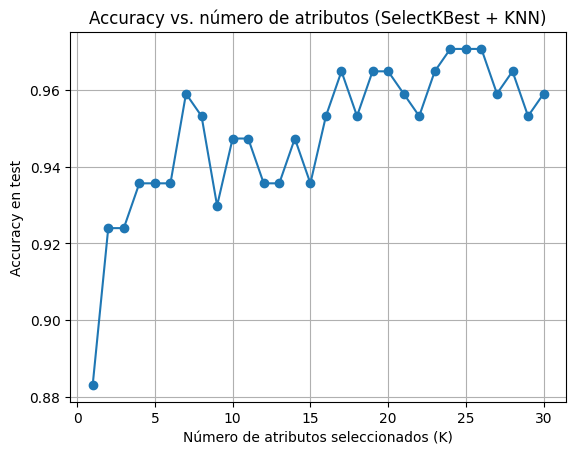

Mejor K = 24 con accuracy = 0.9708


In [ ]:
Ks = range(1, X_train.shape[1] + 1)  # de 1 a 30 atributos
k_knn = 5  # número de vecinos fijo para KNN

accuracies_kbest = []

for K in Ks:
    selector = SelectKBest(score_func=f_classif, k=K)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=k_knn)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    accuracies_kbest.append(accuracy_score(y_test, y_pred))

# Graficamos
import matplotlib.pyplot as plt
plt.plot(Ks, accuracies_kbest, marker="o")
plt.xlabel("Número de atributos seleccionados (K)")
plt.ylabel("Accuracy en test")
plt.title("Accuracy vs. número de atributos (SelectKBest + KNN)")
plt.grid(True)
plt.show()

# Mejor valor de K
mejor_K = Ks[np.argmax(accuracies_kbest)]
mejor_acc = max(accuracies_kbest)
print(f"Mejor K = {mejor_K} con accuracy = {mejor_acc:.4f}")

***f ) A continuación implemente el método de selección de atributos mRMR. Para ello, complete el archivo mRMR.py.***

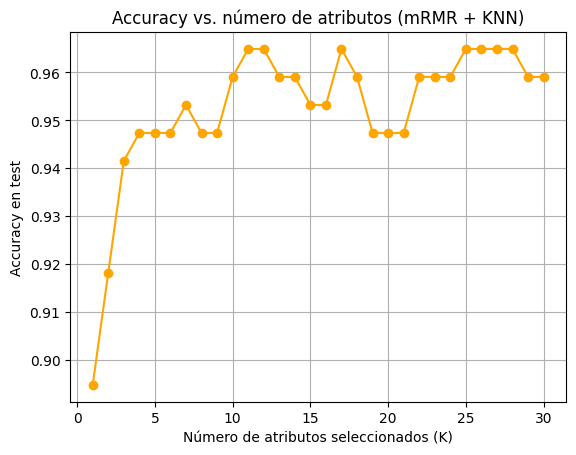

Mejor K (mRMR) = 11 con accuracy = 0.9649


In [ ]:
Ks = range(1, X_train.shape[1] + 1)  # de 1 a 30 atributos
k_knn = 5  # número fijo de vecinos en KNN

accuracies_mrmr = []

for K in Ks:
    selector = mRMR(n_features=K)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_test_sel = selector.transform(X_test)

    clf = KNeighborsClassifier(n_neighbors=k_knn)
    clf.fit(X_train_sel, y_train)
    y_pred = clf.predict(X_test_sel)
    accuracies_mrmr.append(accuracy_score(y_test, y_pred))

# Graficamos
plt.plot(Ks, accuracies_mrmr, marker="o", color="orange")
plt.xlabel("Número de atributos seleccionados (K)")
plt.ylabel("Accuracy en test")
plt.title("Accuracy vs. número de atributos (mRMR + KNN)")
plt.grid(True)
plt.show()

# Mejor valor de K
mejor_K_mrmr = Ks[np.argmax(accuracies_mrmr)]
mejor_acc_mrmr = max(accuracies_mrmr)
print(f"Mejor K (mRMR) = {mejor_K_mrmr} con accuracy = {mejor_acc_mrmr:.4f}")

***g ) ¿Cuál es su mejor valor de k?***

***h) ¿Cul es el papel de la información mutua en el método mRMR? ¿Se podría sustituir por otra métrica?***

***i ) ¿Qué método de selección de atributos, de los dos utilizados, considera que es mejor?***